In [2]:
import networkx as nx
graph = nx.Graph()
graph.add_edge(5, 6)
graph.add_edge(6, 7)

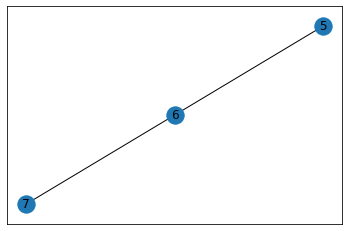

In [5]:
# Jupyter Notebookの場合
%matplotlib inline
nx.draw_networkx(graph) 

In [6]:
import random

def generate_graph(n, m):
    """ ｎ個の頂点とｍ個の辺をもつグラフを作る """
    graph_data = [[0] * n for i in range(n)]
    # 同じ辺が同一視されるようにsetを用意
    edge_set = set()
    while len(edge_set) < m:
        i, j = random.sample(range(n), 2)
        if i > j: i, j = j, i
        edge_set.add((i, j))
        graph_data[i][j] = graph_data[j][i] = 1
    return graph_data, edge_set

In [7]:
random.seed(6)
node_num = 16
edge_num = 20
my_graph, edge_set = generate_graph(node_num, edge_num)
edge_set

{(0, 2),
 (0, 4),
 (0, 8),
 (1, 9),
 (2, 5),
 (2, 7),
 (2, 13),
 (3, 12),
 (3, 15),
 (5, 11),
 (5, 13),
 (6, 8),
 (6, 11),
 (6, 13),
 (7, 8),
 (7, 11),
 (8, 10),
 (12, 13),
 (12, 15),
 (13, 14)}

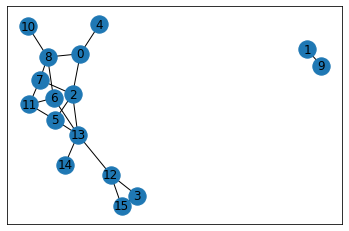

In [8]:
# NetworkXを使ってグラフを描画するコード
graph = nx.Graph()
for u,v in edge_set:
    graph.add_edge(u, v)
nx.draw_networkx(graph) 

In [9]:
my_graph

[[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [10]:
from collections import deque

queue = deque([])
queue.append(1)
queue.append(2)
queue.append(3)
print(queue)

deque([1, 2, 3])


In [11]:
print(queue.popleft())
print(queue)

1
deque([2, 3])


In [12]:
def breadth_first_search(start, W):
    """ 隣接行列Wで表現されるグラフについて、
    startから到達できるnodeの一覧を返す
    """
    # リストをキューにする
    work_queue = deque([])
    visited = set()
    # 初期化
    work_queue.append(start)
    visited.add(start)
    while work_queue:
        print(work_queue)  # work_queueの中身を表示する
        # 今いる頂点
        here = work_queue.popleft()
        # 今いる頂点に隣接する頂点すべてを処理する
        for i, node in enumerate(W[here]):
            # 隣接しなければ何もしない
            if node == 0: continue
            if i not in visited:
                work_queue.append(i)
                visited.add(i)
    return visited

In [13]:
breadth_first_search(1, my_graph)

deque([1])
deque([9])


{1, 9}

In [14]:
breadth_first_search(10, my_graph)

deque([10])
deque([8])
deque([0, 6, 7])
deque([6, 7, 2, 4])
deque([7, 2, 4, 11, 13])
deque([2, 4, 11, 13])
deque([4, 11, 13, 5])
deque([11, 13, 5])
deque([13, 5])
deque([5, 12, 14])
deque([12, 14])
deque([14, 3, 15])
deque([3, 15])
deque([15])


{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}

In [15]:
def depth_first_search(start, W):
    # リストをスタックとして利用する
    work_stack = []
    visited = set()
    work_stack.append(start)
    visited.add(start)
    while work_stack:
        print(work_stack)  # work_stackの中身を表示する
        here = work_stack.pop()
        for i, node in enumerate(W[here]):
            if node == 0: continue
            if i not in visited:
                work_stack.append(i)
                visited.add(i)
    return visited

In [16]:
depth_first_search(10, my_graph)

[10]
[8]
[0, 6, 7]
[0, 6, 2, 11]
[0, 6, 2, 5]
[0, 6, 2, 13]
[0, 6, 2, 12, 14]
[0, 6, 2, 12]
[0, 6, 2, 3, 15]
[0, 6, 2, 3]
[0, 6, 2]
[0, 6]
[0]
[4]


{0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15}

In [17]:
import math
import heapq

def dijkstra(start, W):
    """ スタートの頂点と隣接行列を受け取り、
    到達できるすべての頂点への最短距離を返す。
    """
    # 仮の最短距離を∞に設定
    distance_list = [math.inf] * len(W)
    # スタートの頂点だけ距離を0にする
    distance_list[start] = 0
    # 最短距離が確定した頂点
    done_list = []
    # 次に処理する頂点を決めるためのヒープ
    wait_heap = []
    for i, d in enumerate(distance_list):
        # （スタートからの距離, 頂点）というタプルを作る
        heapq.heappush(wait_heap, (d, i))
    # ヒープが空っぽになるまで処理を続ける
    while wait_heap:
        p = heapq.heappop(wait_heap)
        i = p[1]
        if i in done_list:
            continue
        # この時点でスタートからiへの距離が確定する
        done_list.append(i)
        # i　に隣接するすべての頂点に対する処理
        for j, x in enumerate(W[i]):
            if x == 1 and j not in done_list:
                # 緩和
                d = min(distance_list[j], distance_list[i]+x)
                distance_list[j] = d
                # ｊへの仮の最短距離をdとしてヒープに追加
                heapq.heappush(wait_heap, (d, j))
    return distance_list

In [18]:
dijkstra(10, my_graph)

[2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5]

In [19]:
def all_pairs_shortest_paths(W):
    # 頂点の数
    n = len(W)
    # 結果を格納する行列を用意する
    res = [[0] * n for i in range(n)]
    # 用意した行列を初期化する
    for i in range(n):
        for j in range(i, n):
            if i == j:
                val = 0
            elif W[i][j]:
                val = W[i][j]
            else:
                val = math.inf
            res[i][j] = res[j][i] = val
    # 動的計画法ですべての頂点間の最短距離を求める
    for k in range(n):
        for u in range(n):
            for v in range(n):
                res[u][v] = min(res[u][v], res[u][k] + res[k][v])
    return res

In [20]:
all_pairs_shortest_paths(my_graph)

[[0, inf, 1, 4, 1, 2, 2, 2, 1, inf, 2, 3, 3, 2, 3, 4],
 [inf, 0, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf],
 [1, inf, 0, 3, 2, 1, 2, 1, 2, inf, 3, 2, 2, 1, 2, 3],
 [4, inf, 3, 0, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 1],
 [1, inf, 2, 5, 0, 3, 3, 3, 2, inf, 3, 4, 4, 3, 4, 5],
 [2, inf, 1, 3, 3, 0, 2, 2, 3, inf, 4, 1, 2, 1, 2, 3],
 [2, inf, 2, 3, 3, 2, 0, 2, 1, inf, 2, 1, 2, 1, 2, 3],
 [2, inf, 1, 4, 3, 2, 2, 0, 1, inf, 2, 1, 3, 2, 3, 4],
 [1, inf, 2, 4, 2, 3, 1, 1, 0, inf, 1, 2, 3, 2, 3, 4],
 [inf, 1, inf, inf, inf, inf, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf],
 [2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5],
 [3, inf, 2, 4, 4, 1, 1, 1, 2, inf, 3, 0, 3, 2, 3, 4],
 [3, inf, 2, 1, 4, 2, 2, 3, 3, inf, 4, 3, 0, 1, 2, 1],
 [2, inf, 1, 2, 3, 1, 1, 2, 2, inf, 3, 2, 1, 0, 1, 2],
 [3, inf, 2, 3, 4, 2, 2, 3, 3, inf, 4, 3, 2, 1, 0, 3],
 [4, inf, 3, 1, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 0]]

# 練習問題解答

## 6.1

無向グラフとして表現できる事柄はたくさんある。本書でも例に挙げた、人間関係はわかりやすい例だ。経済活動に目を向けると、会社の取引関係もグラフ構造にできる。頂点が会社や個人事業主、辺は取引関係になる。商取引は、受発注で成り立っている。仕事を発注する側はお金を払い仕事を発注する。受注側はお金を受け取り、商品やサービスを提供する。これを向きを持った矢印で表現すれば、有向グラフになる。

インターネットは、世界中のコンピュータのネットワークなので、グラフ構造として表現できる。頂点はコンピュータ、辺は接続関係としよう。大型のコンピュータ同士は、LANケーブルで物理的に接続されていることが多い。家庭やオフィスで使われるPCやスマートフォンなどは無線通信で接続されていることが多いだろう。どちらにしても、これらのコンピュータが1つの巨大なグラフ構造になっているため、世界中のコンピュータへアクセスすることができる。通信は基本的には双方向なので、これは無向グラフと考えられるが、一般家庭への通信は上り（家庭からプロバイダー）と下り（プロバイダーから一般家庭）の通信速度が違うことが多いので、このことも考慮すると有向グラフとして表現できる。

人は気が付かないうちに、社会や周囲の人々から影響を受けているものだ。これを可視化するのは難しいかも知れないが、似たような事例をグラフで表現することはよくある。学術論文は、その論文を書くために参考にした文献を巻末にまとめる習慣がある。頂点を1つの論文、辺を引用関係にすればグラフができる。引用には向きがあるので、有向グラフとしても表現できる。

生活の中でグラフ構造として表現出来ることは無いか、いつも探し続けると楽しいかもしれない。

## 6.2

幅優先探索の例を示そう。変更した箇所にだけコメントを付けてある。

In [21]:
def breadth_first_search_with_path(start, W):
    work_queue = deque([])
    visited = set()
    # 頂点ペアを保持するリスト
    paths = []
    work_queue.append(start)
    visited.add(start)
    while work_queue:
        here = work_queue.popleft()
        for i, node in enumerate(W[here]):
            if node == 0: continue
            if i not in visited:
                work_queue.append(i)
                visited.add(i)
                # ここから、次の頂点
                paths.append([here, i])
    # 関数の戻り値にpathsを追加
    return visited, paths

In [22]:
# 1つ目の戻り値は使わないので、_としておく
_, paths = breadth_first_search_with_path(0, my_graph)
paths

[[0, 2],
 [0, 4],
 [0, 8],
 [2, 5],
 [2, 7],
 [2, 13],
 [8, 6],
 [8, 10],
 [5, 11],
 [13, 12],
 [13, 14],
 [12, 3],
 [12, 15]]

手作業でグラフを描いてもよいが、NetworkXを使うと便利だ。

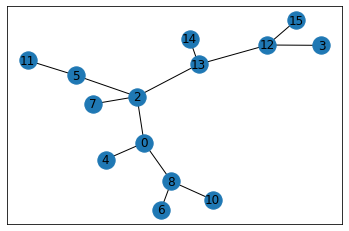

In [23]:
g = nx.Graph()
for u, v in paths:
    g.add_edge(u, v)
nx.draw_networkx(g)

頂点0から各頂点への経路がただ1つしか無いグラフ、つまり木構造になっているのがわかる。

## 6.3

まず、計算結果を変数に格納しよう。

In [24]:
fw_matrix = all_pairs_shortest_paths(my_graph)

In [25]:
fw_matrix

[[0, inf, 1, 4, 1, 2, 2, 2, 1, inf, 2, 3, 3, 2, 3, 4],
 [inf, 0, inf, inf, inf, inf, inf, inf, inf, 1, inf, inf, inf, inf, inf, inf],
 [1, inf, 0, 3, 2, 1, 2, 1, 2, inf, 3, 2, 2, 1, 2, 3],
 [4, inf, 3, 0, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 1],
 [1, inf, 2, 5, 0, 3, 3, 3, 2, inf, 3, 4, 4, 3, 4, 5],
 [2, inf, 1, 3, 3, 0, 2, 2, 3, inf, 4, 1, 2, 1, 2, 3],
 [2, inf, 2, 3, 3, 2, 0, 2, 1, inf, 2, 1, 2, 1, 2, 3],
 [2, inf, 1, 4, 3, 2, 2, 0, 1, inf, 2, 1, 3, 2, 3, 4],
 [1, inf, 2, 4, 2, 3, 1, 1, 0, inf, 1, 2, 3, 2, 3, 4],
 [inf, 1, inf, inf, inf, inf, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf],
 [2, inf, 3, 5, 3, 4, 2, 2, 1, inf, 0, 3, 4, 3, 4, 5],
 [3, inf, 2, 4, 4, 1, 1, 1, 2, inf, 3, 0, 3, 2, 3, 4],
 [3, inf, 2, 1, 4, 2, 2, 3, 3, inf, 4, 3, 0, 1, 2, 1],
 [2, inf, 1, 2, 3, 1, 1, 2, 2, inf, 3, 2, 1, 0, 1, 2],
 [3, inf, 2, 3, 4, 2, 2, 3, 3, inf, 4, 3, 2, 1, 0, 3],
 [4, inf, 3, 1, 5, 3, 3, 4, 4, inf, 5, 4, 1, 2, 3, 0]]

この2次元配列を引数にとり、指定された距離以下の頂点ペアを出力する関数を作る。

In [26]:
def near_k(W, k):
    """ｋ以下の距離にある頂点ペアを返す。
    Wはグラフの頂点数と同じサイズの正方行列とする"""
    n = len(W)
    res = []
    for i in range(n):
        for j in range(i+1, n):
            if W[i][j] <= k: res.append((i, j))
    return res

In [27]:
near_k(fw_matrix, 1)

[(0, 2),
 (0, 4),
 (0, 8),
 (1, 9),
 (2, 5),
 (2, 7),
 (2, 13),
 (3, 12),
 (3, 15),
 (5, 11),
 (5, 13),
 (6, 8),
 (6, 11),
 (6, 13),
 (7, 8),
 (7, 11),
 (8, 10),
 (12, 13),
 (12, 15),
 (13, 14)]

いまは無向グラフを考えているため、行列は対称行列（対角成分を境に上下が同じ値）になっている。このため、ループで走査する領域は行列の上半分だけで十分になる。

## 6.4

隣接行列を引数に、各頂点の次数を計算する関数を作る。隣接行列が0と1から成っているので、それほど難しくない。

In [28]:
def degree(W):
    # キーが頂点、値が次数になる辞書を用意
    res = {}
    for i in range(len(W)):
        res[i] = sum(W[i])
    return res

In [29]:
degree(my_graph)

{0: 3,
 1: 1,
 2: 4,
 3: 2,
 4: 1,
 5: 3,
 6: 3,
 7: 3,
 8: 4,
 9: 1,
 10: 1,
 11: 3,
 12: 3,
 13: 5,
 14: 1,
 15: 2}

近年発達した複雑ネットワーク科学では、現実世界にみられるグラフ構造の多くで、極端に大きな次数をもつ頂点があることがわかっている。こうした頂点はハブ（hub）と呼ばれ、ネットワーク全体への影響力などがさまざまな観点から研究されている。